# TRAVAIL PRATIQUE 3 : METAHEURISTIQUES PVC (Recherche locale)


**Nom d'équipe : Equipe2**

**Membres d'équipe :**
1. Djelloul Oussama ***C.E***
2. Kedadsa Islam Chakib
3. Messar Cylia
4. Tagzirt Elissa
5. Sadi Lina
6. Bousba Neda
7. Tihami Mohamed Hicham

**Groupe : *SIQ1***

**Problème : *Voyageur de commerce***



----



# TRAVAIL DEMANDE

Implementer des algorithme efficace basée sur les methodes de la recherche locale pour déterminer le chemin le plus court permettant à un voyageur de visiter toutes les villes d'un ensemble donné exactement une fois, en revenant au point de départ



----



# Explication des Solutions adaptées :

## **Solution 1 : Recuit simule**

## Recuit Simule non monotone
  * ### Principe
La methode du recuit simule tire son nom et son inspiration de la physique des materiaux le recuit est une operation consistant a laisser refroidir lentement un metal pour ameliorer ses qualites. C'est cette meme idee qui est a la base du recuit simule. Pour eviter que l'algorithme ne reste piege dans des minima locaux, on fait en sorte que la temperature T = T(n) decroisse lentement en fonction du temps.

Plusieurs approches pour le refroidissement de la
température ont été proposées et testées. Elles
peuvent être classées en 3 catégories:
   * **refroidissement continue**
   * **refroidissement par palier**
   * **refroidissement non monotone** : le principe est que la température est réduite d’une manière continue avec occasionnellement une incrémentation de la valeur de la température (Si aucune solution n’est acceptée après un certain temps, on incrémente la valeur de la température car
diminuer la température, diminue les chances
d’accepter de nouvelles solutions)

* ### Algorithme:
 1. Choisir une température de départ T=T0 et une solution initiale S=S0
 2. Générer une solution aléatoire dans le voisinage de la solution actuelle
 3. Calculer la modification ∆ apporte par la nouvelle solution
 4. Si cette modification fait diminuer la fonction objectif, elle est directement acceptée ; Sinon, elle n'est acceptée qu'avec une probabilité égale à  𝑒𝑥𝑝(∆/𝑇)
   * ##### Dans le cas accepter:
 - Diminuer la temperature
 - Mettre le compteur (qui indique si aucune solution n’est acceptée ) a zero
   * ##### Sinon
 - Incrementer le compteur
 5. Si aucune solution n’est acceptée après cooldown_interval, incrémenter la valeur de la température

 Dans un premier temps, T étant généralement choisi très grand, beaucoup de
solutions - même celles dégradant la valeur de f - sont acceptées, et
l'algorithme équivaut à une visite aléatoire de l'espace des solutions. Mais à
mesure que la température baisse, la plupart des solutions augmentant
l'énergie sont refusés, et l'algorithme se ramène à une amélioration itérative
classique.

* ### Parametre:
Pour le choix des parametres nous testons differents valeurs et nous choisisons la meilleure configuration pour s'aprocher de l'optimum global.

## **Solution 2 : La recherche Tabou**

* ### Principe
Cette méthode est spécialement conçue pour surmonter les limites des approches heuristiques traditionnelles. Elle utilise une liste tabou, une forme de mémoire à court terme, qui aide à éviter les cycles répétitifs et favorise une exploration efficace de l'espace des solutions. En guidant la recherche vers des régions peu explorées et en empêchant le retour aux configurations précédemment examinées, l'algorithme évite les pièges des optima locaux, améliorant ainsi les chances de trouver une solution optimale ou proche de l'optimale.

* ### Variantes Principales
 * Taille Variable de la Liste Tabou : Ajustement dynamique de la taille de la liste en fonction des résultats de la recherche pour une flexibilité accrue.
 * Réinitialisation Stratégique : Utilisation de heuristiques pour cibler des régions spécifiques de l'espace de solution lors de la diversification.
 * Intensification Ciblée : Concentration sur des zones prometteuses autour de solutions optimales ou quasi-optimales.
 * Approches Hybrides : Combinaison avec d'autres méthodes d'optimisation comme l'algorithme génétique ou le recuit simulé pour exploiter les avantages de plusieurs techniques.
* ### Algorithme:

 L'algorithme de recherche tabou est le cœur de l'approche. Il fonctionne comme suit :

1. Initialisation : Commence par une solution générée soit aléatoirement, soit par l'algorithme de Christofides pour garantir un point de départ compétitif.

2. Boucle Principale :
* Génération de Voisinage : Produit de nouvelles solutions en appliquant des échanges 2-opt sur la solution actuelle.
* Évaluation et Sélection : Chaque solution voisine est évaluée, et celle avec le coût le plus bas qui n'est pas dans la liste tabou, ou qui satisfait le critère d'aspiration, est choisie.
* Mise à jour Tabou : La solution sélectionnée est ajoutée à la liste tabou pour empêcher sa réélection immédiate, favorisant ainsi l'exploration de nouvelles parties de l'espace de solution.

3. Critères d'Intensification et de Diversification :

*   Intensification : Revisite périodiquement les meilleures solutions trouvéespour les améliorer encore.
*   Élément de liste
Diversification : Réinitialise la solution à une configuration aléatoire pour explorer de nouvelles régions de l'espace de solution en cas de stagnation.

4. Terminaison : L'exécution s'arrête soit après un nombre fixé d'itérations, soit en cas de stagnation définie par un certain nombre d'itérations sans amélioration ou une faible variance dans les coûts des solutions récentes.


Ces adaptations rendent l'algorithme de recherche tabou plus robuste et efficace face à différents types de problèmes d'optimisation, en offrant une exploration méthodique et en évitant les pièges des optima locaux.

# ***-----------------------------------------Implementation----------------------------------***

## Lecture de fichier TSP

In [ ]:
import math
import time
def calculate_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def read_tsp_file(file_path):
    coordinates = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        node_coord_section_index = lines.index('NODE_COORD_SECTION\n')
        for line in lines[node_coord_section_index + 1:]:
            if line.strip() == 'EOF':
                break
            parts = line.strip().split()
            node_id = int(parts[0])
            x, y = map(float, parts[1:])
            coordinates[node_id] = (x, y)
    return coordinates


def create_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distance_matrix = [[0] * num_cities for _ in range(num_cities)]

    for i in range(1, num_cities + 1):
        for j in range(1, num_cities + 1):
            distance_matrix[i - 1][j - 1] = calculate_distance(coordinates[i], coordinates[j])

    return distance_matrix

# Example usage
file_path = "eil101.tsp"
coordinates = read_tsp_file(file_path)
cities = create_distance_matrix(coordinates)


### **Solution 1 : Recuit simule**

In [ ]:
import numpy as np
import random
import math

#Calcule du cout d'un chemin
def total_distance(path, cities):
    distance = 0
    for i in range(len(path) - 1):
        distance += cities[path[i], path[i + 1]]
    distance += cities[path[-1], path[0]]  # Retour à la première ville

    return distance

#Generation du voisin
def generate_neighbor(path):
    i, j = sorted(random.sample(range(len(path)), 2)) #Choisir 2 villes aleatoire
    return path[:i] + path[j:j+1] + path[i+1:j] + path[i:i+1] + path[j+1:] #Permuter entre ces 2 villes


#Algorithme de recuit Simule continue.
#Les parametres sont (matrice d'adjacence, la temperature initiale, coefficient de dimunition de temperature, nombre d'iteration total,
# nombre d'iteration si y'a pas une nouvelle solution, coefficient d'augmentation de temperature )
def simulated_annealing(cities, initial_temperature=10000, cooling_rate=0.88, nb_iter=50000, cooldown_interval=50, cooldown_factor=1.1):
    #initialisation
    current_path = list(range(len(cities)))
    print("Path initial : " , current_path)
    current_distance = total_distance(current_path, cities)
    print("Sa distance : " , current_distance)
    best_path = current_path.copy()
    best_distance = current_distance
    temperature = initial_temperature
    no_improvement_counter = 0


    for _ in range(nb_iter):
        new_path = generate_neighbor(current_path) #generer un voisin
        new_distance = total_distance(new_path, cities)
        delta_distance = new_distance - current_distance
        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
          #On prend le voisin si il ameliore la fonction objectif ou avec une certain probabilite
            current_path = new_path
            current_distance = new_distance


            if current_distance < best_distance:
              #Si le voisin ameliore, il devient la meilleure solution
                best_path = current_path
                best_distance = current_distance

            temperature *= cooling_rate #demunition de temperature
            no_improvement_counter = 0

        else:
          #Si on prend pas le voisin, augmenter le compteur
            no_improvement_counter += 1

        if no_improvement_counter >= cooldown_interval:
          #Si aucune solution n’est acceptée après cooldown_interval, incrémenter la valeur de la température
            temperature *= cooldown_factor
            no_improvement_counter = 0 #reinitialiser le compteur

    return best_path, best_distance


# Exemple d'utilisation
cities = np.array(cities)
start_time = time.time()
best_path, best_distance = simulated_annealing(cities)
RS_time = time.time() - start_time
print("Meilleur chemin trouvé:", best_path)
print("Distance totale:", best_distance)
print("Time:", RS_time)

Path initial :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Sa distance :  2064.487021559086
Meilleur chemin trouvé: [100, 26, 51, 30, 87, 9, 61, 69, 50, 32, 80, 77, 78, 2, 76, 49, 0, 68, 88, 1, 72, 20, 55, 3, 53, 67, 29, 31, 62, 89, 19, 8, 54, 24, 66, 38, 22, 74, 14, 42, 13, 37, 43, 15, 85, 7, 81, 47, 18, 6, 17, 86, 96, 94, 95, 98, 83, 16, 44, 45, 46, 35, 48, 63, 10, 56, 40, 21, 73, 71, 75, 65, 64, 70, 34, 33, 28, 23, 79, 11, 27, 25, 39, 57, 52, 93, 12, 59, 82, 4, 60, 84, 90, 41, 36, 99, 91, 58, 97, 92, 5]
Distance totale: 983.3759267213438
Time: 1.1837623119354248


### **Solution 2 :Recherche Tabou**

In [ ]:
import numpy as np
import random
import time
matrice_distances = cities

# Fonction pour calculer le coût d'une solution
def calculer_cout(S, matrice_distances):
    cout = 0
    n = len(S)
    for i in range(n):
        cout += matrice_distances[S[i]][S[(i + 1) % n]]  # Distance entre la ville i et i+1
    return cout

# Fonction pour générer une solution initiale
def generer_solution_initiale(nb_villes):
    solution = list(range(nb_villes))
    random.shuffle(solution)
    return solution

# Fonction pour générer un voisinage (2-opt swap)
def generer_voisinage(solution):
    voisinage = []
    for i in range(1, len(solution) - 1):
        for j in range(i + 1, len(solution)):
            voisin = solution[:]
            voisin[i:j] = voisin[i:j][::-1]
            voisinage.append(voisin)
    return voisinage

# Implémentation de l'algorithme de recherche tabou
def recherche_tabou(matrice_distances, nb_iterations_max, taille_liste_tabou):
    nb_villes = len(matrice_distances)

    # Initialisations
    solution_courante = generer_solution_initiale(nb_villes)
    meilleure_solution = solution_courante[:]
    cout_meilleure_solution = calculer_cout(meilleure_solution, matrice_distances)
    liste_tabou = []

    # Boucle principale
    for iteration in range(nb_iterations_max):
        voisinage = generer_voisinage(solution_courante)
        couts_voisinage = [calculer_cout(voisin, matrice_distances) for voisin in voisinage]
        # Sélection du meilleur voisin non tabou ou qui respecte le critère d'aspiration
        voisinage_et_couts = sorted([(voisin, cout) for voisin, cout in zip(voisinage, couts_voisinage)], key=lambda x: x[1])
        for voisin, cout_voisin in voisinage_et_couts:
            if (tuple(voisin), cout_voisin) not in liste_tabou or cout_voisin < cout_meilleure_solution:
                solution_courante = voisin
                cout_solution_courante = cout_voisin
                break

        # Mise à jour de la liste tabou
        if len(liste_tabou) >= taille_liste_tabou:
            liste_tabou.pop(0)  # Supprime le plus ancien si la taille maximale est atteinte
        liste_tabou.append((tuple(solution_courante), cout_solution_courante))

        # Mise à jour de la meilleure solution
        if cout_solution_courante < cout_meilleure_solution:
            meilleure_solution = solution_courante[:]
            cout_meilleure_solution = cout_solution_courante

        #print(f"Iteration {iteration}: Cout actuel = {cout_solution_courante}, Meilleur cout = {cout_meilleure_solution}")

    return meilleure_solution, cout_meilleure_solution

# Exemple d'utilisation de l'algorithme de recherche tabou pour le TSP
nb_villes = 101
# Création d'une matrice de distances aléatoire et symétrique avec des diagonales nulles

# Paramètres de l'algorithme
nb_iterations_max = 200
taille_liste_tabou = 15

start_time = time.time()

# Lancement de l'algorithme
meilleure_solution, cout_meilleure_solution = recherche_tabou(matrice_distances, nb_iterations_max, taille_liste_tabou)


end_time = time.time()
elapsed_time = end_time - start_time
print("Meilleure solution trouvée:")
print(meilleure_solution)
print("Coût de la meilleure solution:")
print(cout_meilleure_solution)
print(f"Temps d'exécution: {elapsed_time} secondes")


Meilleure solution trouvée:
[44, 16, 83, 60, 15, 85, 37, 13, 43, 90, 84, 99, 36, 97, 91, 96, 94, 12, 93, 5, 95, 98, 58, 92, 4, 59, 17, 82, 7, 45, 46, 35, 48, 63, 62, 89, 31, 29, 19, 65, 64, 70, 34, 33, 77, 80, 8, 50, 32, 49, 75, 11, 79, 67, 76, 2, 78, 28, 23, 53, 3, 54, 24, 38, 66, 22, 55, 74, 71, 20, 72, 73, 21, 40, 14, 42, 41, 86, 56, 1, 57, 39, 25, 52, 100, 27, 26, 88, 51, 68, 0, 69, 30, 87, 6, 81, 47, 18, 10, 61, 9]
Coût de la meilleure solution:
698.9725133689604
Temps d'exécution: 31.291620016098022 secondes


### **Solution 3 :Recherche Tabou ameliorée**

In [ ]:
import networkx as nx
import numpy as np
import random
import time
from networkx.algorithms.matching import min_weight_matching
import networkx as nx
import numpy as np
import random
import time
from networkx.algorithms.matching import min_weight_matching
matrice_distances = cities



def build_graph_from_distance_matrix(distance_matrix):
    G = nx.Graph()
    for i in range(len(distance_matrix)):
        for j in range(i + 1, len(distance_matrix)):
            G.add_edge(i, j, weight=distance_matrix[i][j])
    return G
# Vous devriez avoir les fonctions calculer_cout, generer_solution_initiale, generer_voisinage, christofides_algorithm déjà définies comme dans votre code précédent.
def calculate_distance(city1, city2, adjacency_matrix):
    """Calculates the distance between two cities using the adjacency matrix."""
    if isinstance(city1, int) and isinstance(city2, int):
        return adjacency_matrix[city1][city2]


def recherche_locale_2opt(adjacency_matrix, route):
    """Performs the 2-opt algorithm to improve a given route. Assumes route and adjacency_matrix are properly formatted."""
    # Ensure that all route indices are integers
    route = [int(r) for r in route]

    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 2, len(route) - 1):  # Assure that we have at least one element between i and j
                # Calculate the current distances between i and i+1, and j and j+1
                current_distance = adjacency_matrix[route[i]][route[i + 1]] + \
                                   adjacency_matrix[route[j]][route[j + 1]]

                # Calculate what the distance would be if we swapped i+1 and j
                new_distance = adjacency_matrix[route[i]][route[j]] + \
                               adjacency_matrix[route[i + 1]][route[j + 1]]

                # If the new distance is less, perform the swap and mark that we improved the route
                if new_distance < current_distance:
                    # Perform the swap: reverse the segment between i+1 and j
                    route[i + 1:j + 1] = route[i + 1:j + 1][::-1]
                    improved = True

    return route



def calculer_cout(route, matrice_distances):
    """Calculates the total travel cost of a given route using the distance matrix."""
    cout_total = 0
    for i in range(len(route) - 1):
        # Get the distance between the current city and the next city
        distance = matrice_distances[route[i]][route[i + 1]]
        cout_total += distance
    # Add the distance to return to the starting city
    cout_total += matrice_distances[route[-1]][route[0]]
    return cout_total


# Fonction pour générer une solution initiale
def generer_solution_initiale(nb_villes):
    # Crée une liste des villes à partir de 1 à nb_villes-1 car 0 est déjà inclus comme point de départ
    villes = list(range(0, nb_villes))
    random.shuffle(villes)
    # Ajoute 0 au début et à la fin pour fermer le circuit
    return  villes

# Fonction pour générer un voisinage (2-opt swap)
def generer_voisinage(S):
    voisinage = []
    for i in range(1, len(S)):
        for j in range(i, len(S)):
            voisin = S[:]
            voisin[i:j] = voisin[i:j][::-1]
            voisinage.append(voisin)
    return voisinage





def christofides_algorithm(G):
    # Trouver un arbre couvrant minimal
    T = nx.minimum_spanning_tree(G, weight='weight')

    # Trouver les sommets de degré impair dans l'arbre couvrant minimal
    odd_degree_nodes = [node for node in T.nodes() if T.degree(node) % 2 == 1]

    # Restreindre le graphe aux sommets de degré impair
    odd_graph = G.subgraph(odd_degree_nodes)

    # Trouver un matching parfait de poids minimum dans le graphe restreint
    matching = min_weight_matching(odd_graph)

    # Ajouter le matching à l'arbre couvrant minimal pour obtenir un multigraphe
    multigraph = nx.MultiGraph(T)
    for edge in matching:
        multigraph.add_edge(edge[0], edge[1], weight=G[edge[0]][edge[1]]['weight'])

    # Trouver un circuit Eulerien dans le multigraphe
    eulerian_circuit = list(nx.eulerian_circuit(multigraph))

    # Convertir le circuit Eulerien en un circuit Hamiltonien et calculer le coût
    visited = set()
    hamiltonian_circuit = []
    total_cost = 0
    last_node = None
    #print(eulerian_circuit)
    for u, v in eulerian_circuit:
        if u not in visited:
            if last_node is not None:
                total_cost += G[last_node][u]['weight']
            visited.add(u)
            hamiltonian_circuit.append(u)
            last_node = u
        if v not in visited:
            if last_node is not None:
                total_cost += G[last_node][v]['weight']
            visited.add(v)
            hamiltonian_circuit.append(v)
            last_node = v
    # Ajouter le coût pour retourner au point de départ
    # Ajouter le coût pour retourner au point de départ pour former un cycle
    if hamiltonian_circuit:
        start_node = hamiltonian_circuit[0]
        end_node = hamiltonian_circuit[-1]
        if start_node != end_node:
            hamiltonian_circuit.append(start_node)
            total_cost += G[end_node][start_node]['weight']

    return hamiltonian_circuit, total_cost


# Fonction pour générer une solution initiale
def generer_solution_initiale(nb_villes):
    return random.sample(range(nb_villes), nb_villes)



# Algorithme de recherche tabou avec intensification, diversification et critère d'aspiration
def recherche_tabou(G,nb_villes, nb_iterations_max, taille_liste_tabou, matrice_distances, diversifier, intensifier, stop_stagnation, max_iter_sans_amelioration, initialize_randomly,seuil_variance):
    # Initialisation
    if initialize_randomly:
      S = generer_solution_initiale(nb_villes)
      meilleur_cout = calculer_cout(S, matrice_distances)
    else:
     S, meilleur_cout = christofides_algorithm(G) # Christofides
     S = recherche_locale_2opt(adjacency_matrix=matrice_distances ,route=S)

    meilleure_solution = S[:]
    liste_tabou = []
    iter_sans_amelioration = 0
    var_couts = []

    # Boucle principale
    for iteration in range(nb_iterations_max):
        voisinage = generer_voisinage(S)
        S_prime, cout_S_prime = None, float('inf')

        # Recherche d'une meilleure solution dans le voisinage
        for voisin in voisinage:
            cout_voisin = calculer_cout(voisin, matrice_distances)
            if (cout_voisin < cout_S_prime and
                (voisin not in liste_tabou or cout_voisin < meilleur_cout)):
                S_prime = voisin
                cout_S_prime = cout_voisin


        # Mise à jour de la meilleure solution trouvée
        if S_prime and cout_S_prime < meilleur_cout:
            meilleure_solution = S_prime[:]
            meilleur_cout = cout_S_prime

            if stop_stagnation:
              #print(iter_sans_amelioration)
              iter_sans_amelioration = 0  # Réinitialisation du compteur d'itérations sans amélioration
            var_couts.append(cout_S_prime)
        else:
            if stop_stagnation:
              iter_sans_amelioration += 1  # Incrémenter le compteur

        # Mise à jour de la solution actuelle et de la liste tabou
        S = S_prime or S
        liste_tabou.append(S)
        if len(liste_tabou) > taille_liste_tabou:
            liste_tabou.pop(0)

        # Intensification: Revenir à la meilleure solution périodiquement
       # Diversification et Intensification
        if iteration % 100 == 0 and iteration != 0:
            if (random.random() > 0.5):  # Diversification
              if diversifier:
                S= generer_solution_initiale(nb_villes)
            else:  # Intensification
               if intensifier:
                 if (random.random() > 0.5):
                    print(S_prime)
                    S = recherche_locale_2opt(adjacency_matrix=matrice_distances ,route=S_prime)
                 else :
                    S = generer_solution_initiale(nb_villes)
                    liste_tabou = []


        # Stop si stagnation
        if stop_stagnation:
          if iter_sans_amelioration >= max_iter_sans_amelioration:
              print(f"Stagnation atteinte à l'itération {iteration}, arrêt prématuré.")
              break

        # Variation de la taille de la liste tabou
        taille_liste_tabou = 10 if iteration % 15 == 0 else 15

        #print(f"Iteration {iteration}: Cout actuel = {cout_S_prime}, Meilleur cout = {meilleur_cout}")

        if len(var_couts) > 10:
            variance = np.var(var_couts[-10:])
            if variance < seuil_variance:
                break

    return meilleure_solution, meilleur_cout

G=build_graph_from_distance_matrix(matrice_distances)
# Paramètres de l'algorithme
nb_villes = 101 # Nombre de villes
nb_iterations_max = 1000  # Nombre d'itérations maximal
taille_liste_tabou_initiale = 20  # Taille initiale de la liste tabou
diversifier = True
intensifier = True
stop_stagnation = True
max_iter_sans_amelioration =30
initialize_randomly = False
seuil_variance = 1e-4
start_time = time.time()
# Exécution de l'algorithme de recherche tabou
meilleure_solution, cout_meilleure_solution = recherche_tabou(G,nb_villes, nb_iterations_max, taille_liste_tabou_initiale, matrice_distances, diversifier, intensifier, stop_stagnation, 30, initialize_randomly,seuil_variance)



end_time = time.time()
elapsed_time = end_time - start_time

print("Meilleure solution trouvée:")
print(meilleure_solution)
print("Coût de la meilleure solution:")
print(cout_meilleure_solution)
print(f"Temps d'exécution: {elapsed_time} secondes")




Stagnation atteinte à l'itération 58, arrêt prématuré.
Meilleure solution trouvée:
[0, 68, 26, 27, 100, 52, 39, 57, 12, 93, 5, 88, 51, 17, 95, 98, 58, 91, 94, 96, 86, 1, 56, 14, 42, 41, 99, 90, 36, 97, 92, 84, 60, 15, 43, 13, 37, 85, 16, 83, 4, 59, 82, 44, 45, 7, 81, 6, 47, 46, 35, 48, 63, 62, 89, 31, 9, 10, 18, 61, 87, 30, 69, 29, 19, 65, 64, 70, 34, 8, 50, 32, 80, 33, 77, 78, 2, 28, 23, 53, 54, 24, 3, 55, 38, 66, 22, 74, 40, 21, 73, 71, 72, 20, 25, 11, 79, 67, 76, 75, 49, 0]
Coût de la meilleure solution:
671.7550767401576
Temps d'exécution: 9.84433913230896 secondes


# **TABLEAU DE TEST**

## Test sur le recuit simulé



Dans ce qui suit on a 5 parametres à varié dans le recuit simulé à chaque etape on fixe 4 et on varie le parametre restant les resultats des tests sont representé dans les tableaux suivants :

### Variation de la temperature initiale T0

Coefficient de dimunution = 0,99

Coefficient d'augmentation = 1,1

Nombre d'iteration = 50000

Nb iteration sans changement de solution = 1000






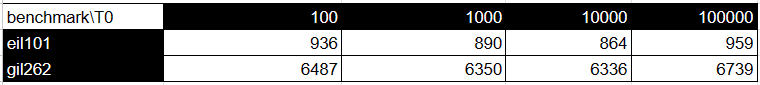

### Variation coefficient de dimunution

La temperature initiale T0 = 10000

Nombre d'iteration = 50000

Nb iteration sans changement de solution = 1000

Coefficient d'augmentation = 1,1

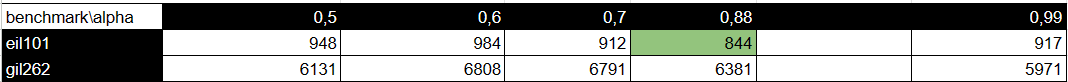

### Variation de nombre d'itetations

La temperature initiale T0 = 10000

Coefficient de dimunution = 0,88

Nb iteration sans changement de solution = 1000

Coefficient d'augmentation = 1,1

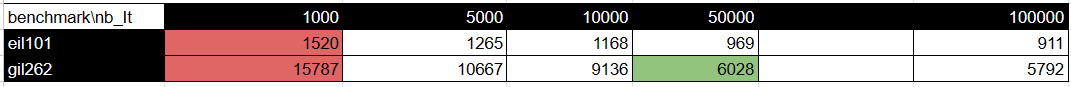

### Variation nb iteration sans changement de solution


La temperature initiale T0 = 10000

Coefficient de dimunution = 0,88

Nombre d'iteration = 50000

Coefficient d'augmentation = 1,1



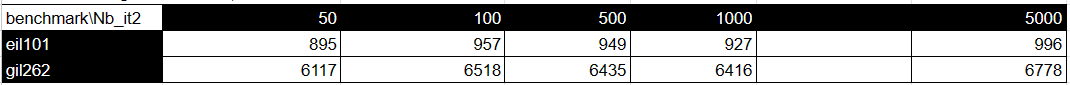

### Variation de coefficient d'augmentation

La temperature initiale T0 = 10000

Coefficient de dimunution = 0,88

Nombre d'iteration = 50000

Nb iteration sans changement de solution = 50

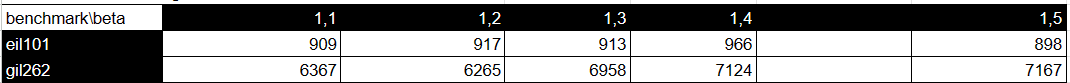

## Test sur la recherche tabou

1. RT sans amélioration (1) : C'est l'algorithme de recherche tabou exécuté dans sa forme de base sans optimisations supplémentaires.

2. RT avec amélioration itérative avec une solution aléatoire (2) : Cela semble indiquer que l'algorithme de recherche tabou a été amélioré par l'utilisation de solutions initiales générées de manière aléatoire, ce qui pourrait potentiellement aider à explorer l'espace de solution plus largement.

3. RT avec amélioration itéralisée avec l'heuristique de Christofides (3) : Ici, l'algorithme de recherche tabou a été initié avec une solution fournie par l'algorithme de Christofides, une approche réputée pour fournir une bonne solution de départ pour le TSP.

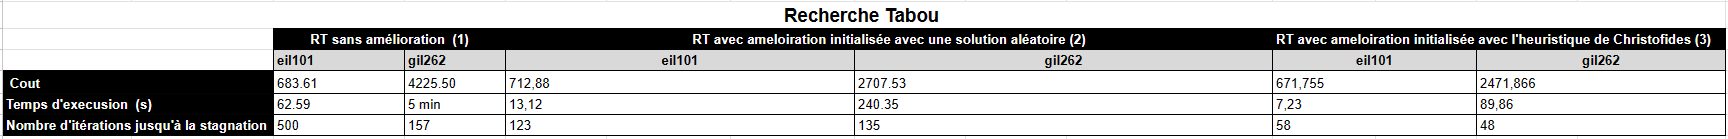

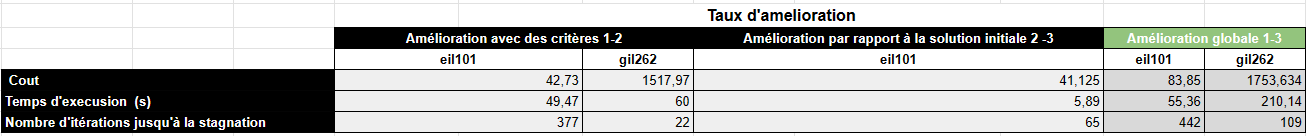